<a href="https://colab.research.google.com/github/2303A52058/Generative-AI/blob/main/Gen_AI_A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

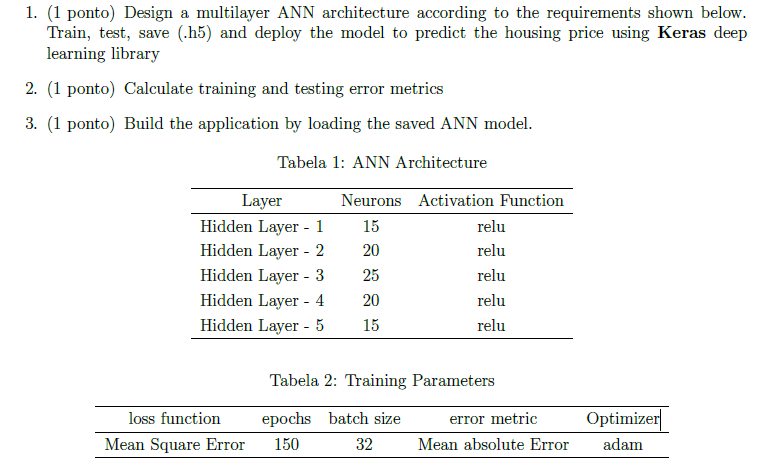

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("Housing.csv")
def encode_columns(df, columns):
    for col in columns:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = encode_columns(df, categorical_cols)
X = df.drop(columns=['price'])
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = keras.Sequential([
    keras.layers.Dense(15, activation='tanh', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(20, activation='tanh'),
    keras.layers.Dense(15, activation='tanh'),
    keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer=keras.optimizers.SGD(), loss='mse', metrics=['mse'])
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
model.save("housing_ann.h5")

def predict_price(input_data):
    model = keras.models.load_model("housing_ann.h5", custom_objects={'mse': tf.keras.losses.MeanSquaredError})
    input_data_scaled = scaler.transform([input_data])
    return model.predict(input_data_scaled)[0][0]
example_input = X.iloc[0].values
predicted_price = predict_price(example_input)
print("Predicted Price:", predicted_price)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8824698175488.0000 - mse: 8824698175488.0000 - val_loss: 5271972741120.0000 - val_mse: 5271972741120.0000
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3120389947392.0000 - mse: 3120389947392.0000 - val_loss: 5232291479552.0000 - val_mse: 5232290955264.0000
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3679338364928.0000 - mse: 3679338364928.0000 - val_loss: 5139007537152.0000 - val_mse: 5139007537152.0000
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3226544111616.0000 - mse: 3226544111616.0000 - val_loss: 5448675098624.0000 - val_mse: 5448675098624.0000
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3572937523200.0000 - mse: 3572937523200.0000 - val_loss: 5064210513920.0000 - val_mse: 5064210513920.0000
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3210231939072.0000 - mse: 3210231939072.0000 - val_loss: 5101132972032.0000 - val_mse: 5101132972032.0000
Epoch 7/100
28/28 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Price: 5101422.5
